# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Create the database.
honeyDF = pd.read_csv("C:\\Users\\Khazbin\\Desktop\\Data Analysis\\Graded Assignment 4\\US_honey_production_dataset.csv")

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [3]:
# Checking for missing data. None found - good.
for col in honeyDF.columns:
    pctMissing = np.mean(honeyDF[col].isnull())
    print('{} - {}%'.format(col, round(pctMissing*100)))

Unnamed: 0 - 0%
state - 0%
colony_number - 0%
yield_per_colony - 0%
productions - 0%
stocks - 0%
average_price - 0%
value_of_prod - 0%
year - 0%


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

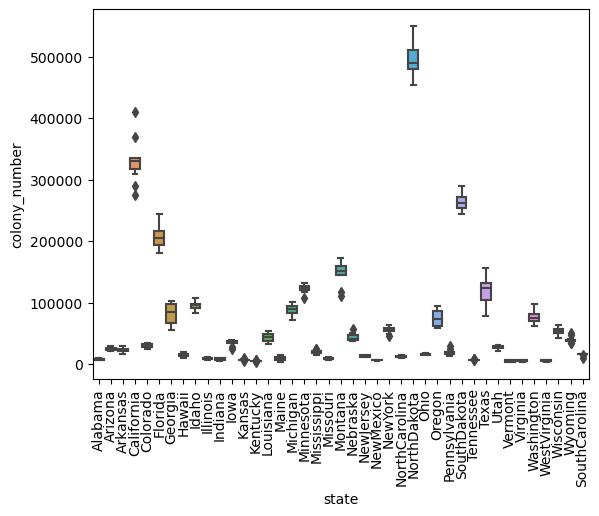

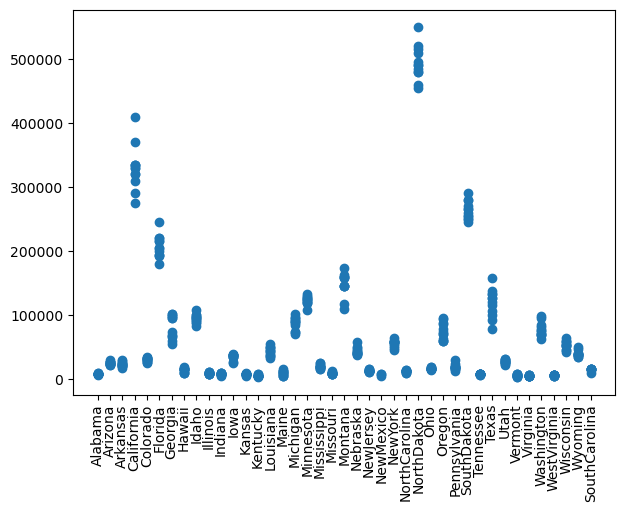

In [30]:
# Checking for outliers with a boxplot.
sb.boxplot(x = 'state', y = 'colony_number', data = honeyDF)
plt.xticks(rotation=90)

# Checking for outliers with a scatterplot. Produces the same shapes as the boxplot.
fig, h = plt.subplots(figsize = (7,5))
h.scatter(honeyDF['state'],honeyDF['colony_number'])
plt.xticks(rotation=90)
plt.show()

# Decided not to remove any outliers given the nature of honey production and the impact of colony collapse disorder,
# weather, etc. on the overall health and robustness of the bees and available forage.

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [31]:
# Based on the EDA from the last assignment, both Unnamed: 0 and stocks are unnecessary for me and can be dropped.

# Drop unneceassary columns (stocks data is just a repeat or productions) and rename remaining columns.
honeyDFD = honeyDF.drop(columns=['Unnamed: 0','stocks'])
honeyDFR = honeyDFD.rename(columns = {"state":"State","colony_number":"NumberOfColonies",
"yield_per_colony":"YieldPerColony","productions":"Production","average_price":"AveragePrice",
"value_of_prod":"ProductionValue","year":"Year"})

honeyDFR.head()

,State,NumberOfColonies,YieldPerColony,Production,AveragePrice,ProductionValue,Year
0,Alabama,9000,54,73000,240.0,1166000,2010
1,Arizona,24000,77,665000,152.0,2809000,2010
2,Arkansas,25000,60,360000,147.0,2205000,2010
3,California,410000,67,6318000,155.0,42579000,2010
4,Colorado,34000,56,533000,152.0,2894000,2010


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [76]:
# Checking for number of unique values in each column sorted by state.
honeyDFR.groupby('State').nunique()

# # Checking which years New Mexico and South Carolina have data for - these had less than 12 years each.
honeyDFR.loc[honeyDFR['State'] == "NewMexico"] # Only three years from the beginning of the data
# # collection period. Worth dropping.
honeyDFR.loc[honeyDFR['State'] == "SouthCarolina"] # Eight years from the end of the data collection period. Keep.

# # Checking why Indiana and Missouri have fewer unique production values than expected.
honeyDFR.loc[honeyDFR['State'] == "Indiana"] # Same production values for 2016 and 2017 but the rest of the data differs.
# Not a duplicate - keep.
honeyDFR.loc[honeyDFR['State'] == "Missouri"] # Same production values for 2016 and 2018 but the rest of the data differs.
# Not a duplicate - keep. Can see format of AveragePrice changes after 2017.

# Updating AveragePrice to reasonable price - is supposed to be price per pound of honey. No one would pay hundreds of
# dollars for one pound of honey
honeyDFR["AveragePrice"] = np.where(honeyDFR["AveragePrice"] >= 100, honeyDFR["AveragePrice"]/100, honeyDFR["AveragePrice"])

# Check update against original data.
honeyDFR.loc[honeyC['State'] == "SouthCarolina"]
honeyDF.loc[honeyDF['state'] == "SouthCarolina"]

# Dropping New Mexico Data. Not enough years of data gathered and all years are early on.
honeyDFR = honeyDFR.drop(honeyDFR[honeyDFR['State'] == "NewMexico"].index)
honeyDFR.groupby('State').nunique()

# Updating Production to match what Kaggle info says it should be - NumberOfColonies*YieldPerColony.
honeyDFR.loc[honeyDFR["Production"] != honeyDFR["NumberOfColonies"].multiply(honeyDFR["YieldPerColony"]), "Production"] = honeyDFR["NumberOfColonies"].multiply(honeyDFR["YieldPerColony"])

# Checking that update was successful.
honeyDFR.loc[honeyDFR['State'] == "Wisconsin"]

# Updating ProductionValue to match what Kaggle info says it should be - Production*AveragePrice.
honeyDFR.loc[honeyDFR["ProductionValue"] != honeyDFR["Production"].multiply(honeyDFR["AveragePrice"]), "ProductionValue"] = honeyDFR["Production"].multiply(honeyDFR["AveragePrice"])

# Checking that update was successful.
honeyDFR.loc[honeyDFR['State'] == "Wisconsin"]

,State,NumberOfColonies,YieldPerColony,Production,AveragePrice,ProductionValue,Year
38,Wisconsin,64000,64,4096000,1.68,6881280.0,2010
78,Wisconsin,57000,63,3591000,1.89,6786990.0,2011
118,Wisconsin,60000,69,4140000,2.05,8487000.0,2012
157,Wisconsin,59000,60,3540000,2.38,8425200.0,2013
197,Wisconsin,53000,54,2862000,2.38,6811560.0,2014
237,Wisconsin,52000,67,3484000,2.43,8466120.0,2015
277,Wisconsin,54000,62,3348000,2.67,8939160.0,2016
317,Wisconsin,53000,56,2968000,2.82,8369760.0,2017
357,Wisconsin,51000,45,2295000,2.95,6770250.0,2018
397,Wisconsin,46000,47,2162000,3.00,6486000.0,2019


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
I didn't find any Null values in my data, but I did find the rest of the dirty data types.

2. Did the process of cleaning your data give you new insights into your dataset?
Yes. I realized that the data from New Mexico wouldn't be useful for analysis given how few data points this state had.

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
Visualizations don't work very well when you happen to have many points of data. Also, not all outliers need to be dropped - there may be extenuating circumstances that could make these data valuable. AveragePrice, Production, and ProductionValue information was successfully updated as per Kaggle's information - in the real world, I would double check with the owner of the data set if values were not as they should be before updating them.

In [78]:
# Exporting as a new .csv file.
honeyDFR.to_csv("C:\\Users\\Khazbin\\Desktop\\Data Analysis\\Graded Assignment 4\\NewUSHoneyProductionDataset.csv")